<a href="https://colab.research.google.com/github/chuquoctuan123456/Predict-Stock/blob/main/Predict_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U vnstock3

In [ ]:
from vnstock3 import Vnstock

In [ ]:
from vnstock3 import *
import matplotlib.pyplot as plt

In [ ]:
stock = Vnstock().stock(symbol='VN30F1M', source='VCI')
stock

In [ ]:
stock.listing.all_symbols()

,ticker,organ_name
0,A32,Công ty Cổ phần 32
1,AAA,Công ty Cổ phần Nhựa An Phát Xanh
2,AAM,Công ty Cổ Phần Thủy Sản MeKong
3,AAS,Công ty Cổ phần Chứng khoán SmartInvest
4,AAT,Công ty Cổ phần Tập đoàn Tiên Sơn Thanh Hóa
...,...,...
1593,XPH,Công ty Cổ phần Xà phòng Hà Nội
1594,YBC,Công ty Cổ phần Xi măng và Khoáng sản Yên Bái
1595,YBM,Công ty Cổ phần Khoáng sản Công nghiệp Yên Bái
1596,YEG,Công ty Cổ phần Tập đoàn Yeah1


In [ ]:
len(stock.listing.symbols_by_group("VNMidCap").to_list())

70

In [ ]:
df = stock.quote.history(start='2010-01-01', end='2024-12-31')
df

,time,open,high,low,close,volume
0,2017-08-10,757.9,757.9,745.5,745.9,367
1,2017-08-11,746.0,746.4,743.4,745.7,510
2,2017-08-14,745.9,748.9,745.7,748.9,707
3,2017-08-15,750.3,750.9,748.0,748.0,916
4,2017-08-16,747.7,748.4,745.1,748.1,1065
...,...,...,...,...,...,...
1671,2024-05-13,1271.6,1274.6,1261.9,1266.0,198589
1672,2024-05-14,1269.2,1279.1,1269.2,1274.4,218730
1673,2024-05-15,1277.4,1293.4,1277.3,1286.1,202500
1674,2024-05-16,1295.1,1311.0,1294.2,1309.8,180049


In [ ]:
import plotly.graph_objs as go
import pandas as pd
fig = go.Figure(data=[go.Candlestick(x=df['time'],
                                     open=df['open'],
                                     high=df['high'],
                                     low=df['low'],
                                     close=df['close'],
                                     name='Candlestick'),
                      go.Bar(x=df['time'],
                             y=df['volume'],
                             name='Volume',
                             marker_color='rgba(158,202,225,0.5)',
                             yaxis='y2')])

fig.update_layout(yaxis2=dict(title='Volume', overlaying='y', side='right'),
                  title='Candlestick Chart with Volume',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

In [ ]:
import pandas as pd


In [ ]:
df['year'] = df['time'].dt.year
last_day_of_year = df.groupby('year').apply(lambda x: x.loc[x['time'].idxmax()])
annual_close = last_day_of_year[['year', 'close']]
annual_close['growth(%)'] = round(annual_close['close'].pct_change() * 100 ,2)


<ipython-input-141-4fa73447ce31>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Mức độ tăng trưởng hằng năm của thị trường
growth_yearly = pd.DataFrame(annual_close)
growth_yearly = growth_yearly.reset_index(drop=True)
growth_yearly

,year,close,growth(%)
0,2017,980.0,NaN
1,2018,855.0,-12.76
2,2019,876.3,2.49
3,2020,1083.9,23.69
4,2021,1537.0,41.80
5,2022,1004.5,-34.65
6,2023,1134.6,12.95
7,2024,1307.9,15.27


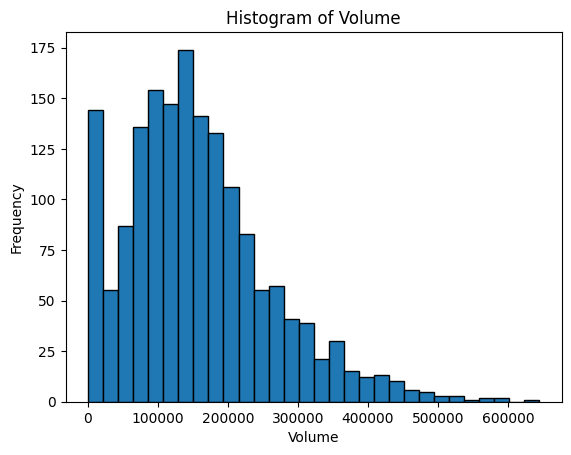

In [ ]:
plt.hist(df["volume"], bins=30, edgecolor='black')  # 'bins' xác định số lượng cột trong histogram
plt.xlabel('Volume')  # Đặt nhãn cho trục x
plt.ylabel('Frequency')  # Đặt nhãn cho trục y
plt.title('Histogram of Volume')  # Đặt tiêu đề cho biểu đồ
plt.show()  # Hiển thị biểu đồ

In [ ]:
# Mỗi ngày tăng bao nhiêu phần trăm so với ngày trước đó
df['pct_change_close(%)'] = round(df['close'].pct_change() * 100,2)

In [ ]:
df.head()

,time,open,high,low,close,volume,year,pct_change_close(%)
0,2017-08-10,757.9,757.9,745.5,745.9,367,2017,NaN
1,2017-08-11,746.0,746.4,743.4,745.7,510,2017,-0.03
2,2017-08-14,745.9,748.9,745.7,748.9,707,2017,0.43
3,2017-08-15,750.3,750.9,748.0,748.0,916,2017,-0.12
4,2017-08-16,747.7,748.4,745.1,748.1,1065,2017,0.01


In [ ]:
df.loc[df['pct_change_close(%)'].idxmax()]

time                   2020-05-21 00:00:00
open                                 807.5
high                                 864.0
low                                  805.1
close                                864.0
volume                               90311
year                                  2020
pct_change_close(%)                    7.0
Name: 693, dtype: object

### Phân tích cổ phiếu MBB : Ngân hàng quân đội

In [ ]:
pip install --upgrade vnstock

In [ ]:
from vnstock import *


In [ ]:
df =  stock_historical_data(symbol='MBB',
                            start_date="2010-01-01",
                            end_date='2024-05-19', resolution='1D', type='stock')
df = df.drop(["ticker"] ,axis = 1)

In [ ]:
df

,time,open,high,low,close,volume
0,2012-03-20,3410,3480,3390,3480,3748430
1,2012-03-21,3520,3630,3500,3550,8486760
2,2012-03-22,3520,3570,3450,3450,5042930
3,2012-03-23,3500,3570,3450,3500,6886300
4,2012-03-26,3550,3550,3390,3390,4345740
...,...,...,...,...,...,...
3030,2024-05-13,22600,23000,22600,22650,14003500
3031,2024-05-14,22900,23200,22700,22850,16668300
3032,2024-05-15,22950,23050,22800,22900,15300500
3033,2024-05-16,23150,23550,23000,23400,31430700


In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
last_day_of_year = df.groupby('year').apply(lambda x: x.loc[x['time'].idxmax()])
annual_close = last_day_of_year[['year', 'close']]
annual_close['growth(%)'] = round(annual_close['close'].pct_change() * 100 ,2)


<ipython-input-151-5ab877274dfc>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Mức độ tăng trưởng hằng năm của thị trường
growth_yearly = pd.DataFrame(annual_close)
growth_yearly = growth_yearly.reset_index(drop=True)
growth_yearly

,year,close,growth(%)
0,2012,3020,NaN
1,2013,3270,8.28
2,2014,3660,11.93
3,2015,4330,18.31
4,2016,4360,0.69
5,2017,8620,97.71
6,2018,8010,-7.08
7,2019,9490,18.48
8,2020,12040,26.87
9,2021,20430,69.68


In [ ]:
# Mỗi ngày tăng bao nhiêu phần trăm so với ngày trước đó
df['pct_change_close(%)'] = round(df['close'].pct_change() * 100,2)

In [ ]:
bank = ["VPB", "VIB", "VCB", "TCB", "STB", "SSB", "SHB", "PVF", "NAB", "MBB", "LPB", "TPB", "OCB", "MSB", "HDB", "EVF", "EIB", "CTG", "BID", "ACB"]

In [ ]:
analyst_bank = industry_analysis("MBB", lang='vi')

In [ ]:
df_transposed = analyst_bank.transpose().reset_index()

In [ ]:
df_transposed

,Mã CP,Vốn hóa (tỷ),Giá,Số phiên tăng/giảm liên tiếp,P/E,PEG,P/B,Cổ tức,ROE,ROA,...,Tỉ lệ nợ xấu,Nợ/Vốn CSH,LNST 5 năm,Doanh thu 5 năm,LNST quý gần nhất,Doanh thu quý gần nhất,LNST năm tới,Doanh thu năm tới,RSI,rs
0,MBB,122925,23250,-1,6.1,0.5,1.2,0.027,0.227,0.024,...,0.025,7.9,0.276,0.193,-0.091,0.023,0.109,0.183,52.6,43.0
1,VCB,513079,91800,-1,15.7,2.8,3.0,0.0,0.205,0.018,...,0.012,9.2,0.177,0.115,-0.083,0.083,0.117,0.075,47.3,44.0
2,BID,281317,49350,-1,12.8,1.3,2.2,0.0,0.191,0.01,...,0.015,17.0,0.242,0.105,-0.043,-0.167,0.067,0.056,47.0,46.0
3,CTG,177747,33100,-1,8.8,0.5,1.4,0.0,0.167,0.01,...,0.013,14.9,0.304,0.199,-0.19,0.032,0.061,0.149,50.2,40.0
4,TCB,175245,49750,-1,8.9,2.9,1.3,0.047,0.156,0.025,...,0.011,5.4,0.163,0.169,0.401,0.113,-0.084,0.084,66.4,83.0
5,VPB,153918,19400,0,13.9,-1.7,1.1,0.052,0.093,0.015,...,0.048,4.8,0.063,0.099,0.757,0.005,0.532,0.297,59.8,40.0
6,ACB,109724,28250,0,6.9,0.8,1.5,0.0,0.23,0.024,...,0.015,8.7,0.256,0.185,-0.025,-0.025,0.09,0.081,63.7,56.0
7,HDB,70775,24300,4,6.4,0.2,1.4,0.0,0.256,0.021,...,0.022,11.1,0.288,0.228,-0.07,-0.061,0.204,0.155,59.6,65.0
8,LPB,59337,23200,4,9.0,0.2,1.6,0.0,0.215,0.018,...,0.014,10.3,0.422,0.262,-0.125,-0.31,0.261,0.026,78.3,94.0
9,VIB,56571,22300,0,6.7,-1.5,1.5,0.068,0.237,0.022,...,0.036,9.8,0.313,0.295,0.052,-0.09,0.088,0.05,58.1,56.0


In [ ]:
df.columns

Index(['time', 'open', 'high', 'low', 'close', 'volume', 'year',
       'pct_change_close(%)'],
      dtype='object')

# Xử lí dữ liệu

In [ ]:
# Tính ROC với khung thời gian 14 phiên:
ROC = (df['close'] - df['close'].shift(14)) / df['close'].shift(14) * 100


In [ ]:
#Tính giá cao nhất và thấp nhất trong 14 phiên giao dịch trước đó
H14 = df['close'].rolling(window=14).max()
L14 = df['close'].rolling(window=15).min()

# Tính chỉ số %K
K = (df['close'] - L14) * 100 / (H14 - L14)
K

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3030     72.222222
3031     94.444444
3032    100.000000
3033    100.000000
3034     86.956522
Name: close, Length: 3035, dtype: float64

In [ ]:
# Tính chỉ số R%
R = (H14 - df['close'])*100/(H14 - L14)


In [ ]:
# Tính CCI
mean_price = (df['high'] + df['low'] + df['close']) / 3

# Tính SMA20 của giá điển hình
SMA20 = mean_price.rolling(window=20).mean()

# Tính độ lệch chuẩn của giá điển hình trong 20 phiên
std_20 = mean_price.rolling(window=20).std()

# Tính CCI
CCI = (mean_price - SMA20) / (0.015 * std_20)



In [ ]:
# Tính RSI
delta = df['close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
RSI = 100 - (100 / (1 + rs))

In [ ]:
# Tính MACD
# Tính EMA12 và EMA26
EMA12 = df['close'].ewm(span=12, adjust=False).mean()
EMA26 = df['close'].ewm(span=26, adjust=False).mean()

# Tính MACD
MACD = EMA12 - EMA26

In [ ]:
# Tính toán OBV
# Khởi tạo cột OBV với giá trị 0
# Tính toán OBV
df['OBV'] = 0  # Khởi tạo cột OBV với giá trị 0
for i in range(1, len(df)):
    if df.loc[i, 'close'] > df.loc[i - 1, 'close']:
        df.loc[i, 'OBV'] = df.loc[i - 1, 'OBV'] + df.loc[i, 'volume']
    elif df.loc[i, 'close'] < df.loc[i - 1, 'close']:
        df.loc[i, 'OBV'] = df.loc[i - 1, 'OBV'] - df.loc[i, 'volume']
    else:
        df.loc[i, 'OBV'] = df.loc[i - 1, 'OBV']

In [ ]:
OBV = df["OBV"]

In [ ]:
df = df.drop("OBV" ,axis = 1)

In [ ]:
price = df["close"]

In [ ]:
time = df["time"]

In [ ]:
data = {
    "time": time,  # Thay time_data bằng dữ liệu thời gian của bạn
    "Price Close": price,  # Dữ liệu giá đóng cửa
    "ROC": ROC,  # Dữ liệu ROC
    "%K": K,  # Dữ liệu K
    "%R": R,  # Dữ liệu R
    "CCI": CCI,  # Dữ liệu CCI
    "RSI": RSI,  # Dữ liệu RSI
    "MACD": MACD,  # Dữ liệu MACD
    "OBV": OBV  # Dữ liệu OBV
}
# Tạo DataFrame df_train từ dữ liệu và column
df_train = pd.DataFrame(data)

In [ ]:
df_train.dropna(axis=0, inplace=True)

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_train.columns

Index(['time', 'Price Close', 'ROC', '%K', '%R', 'CCI', 'RSI', 'MACD', 'OBV'], dtype='object')

### Ta dự đoán giá bằng cách sử dụng các chỉ số 'ROC', '%K', '%R', 'CCI', 'RSI', 'MACD', 'OBV' với mô hình voting regression

In [ ]:
X = df_train.drop(["Price Close" ,"time"] ,axis = 1)
y = df_train["Price Close"]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import Ridge, BayesianRidge, ElasticNet
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình và danh sách các tham số cần tìm kiếm
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0]}

bayes_ridge = BayesianRidge()
bayes_ridge_params = {'alpha_1': [1e-6, 1e-5, 1e-4], 'alpha_2': [1e-6, 1e-5, 1e-4], 'lambda_1': [1e-6, 1e-5, 1e-4], 'lambda_2': [1e-6, 1e-5, 1e-4]}

elastic_net = ElasticNet()
elastic_net_params = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}

# Tìm kiếm siêu tham số tốt nhất cho mỗi mô hình
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

bayes_ridge_grid = GridSearchCV(bayes_ridge, bayes_ridge_params, cv=5)
bayes_ridge_grid.fit(X_train, y_train)

elastic_net_grid = GridSearchCV(elastic_net, elastic_net_params, cv=5)
elastic_net_grid.fit(X_train, y_train)

# In ra các tham số tốt nhất cho mỗi mô hình
print("Best parameters for Ridge Regression:", ridge_grid.best_params_)
print("Best parameters for Bayesian Ridge Regression:", bayes_ridge_grid.best_params_)
print("Best parameters for ElasticNet Regression:", elastic_net_grid.best_params_)


In [ ]:
ridge = Ridge(alpha=10)
bayes_ridge = BayesianRidge(alpha_1 = 1e-06, alpha_2 = 0.0001, lambda_1 = 0.0001, lambda_2 = 1e-06)
elastic_net = ElasticNet(alpha = 10.0, l1_ratio =  0.2)

# Tạo bộ VotingRegressor
voting_regressor = VotingRegressor([
    ('ridge', ridge),
    ('bayes_ridge', bayes_ridge),
    ('elastic_net', elastic_net)
])

# Huấn luyện bộ kết hợp
voting_regressor.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = voting_regressor.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=9.84637e-21): result may not be accurate.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# Tính toán các độ đo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 4223978.036035975
R-squared: 0.897586325608677
Mean Absolute Error: 1745.6163574363609


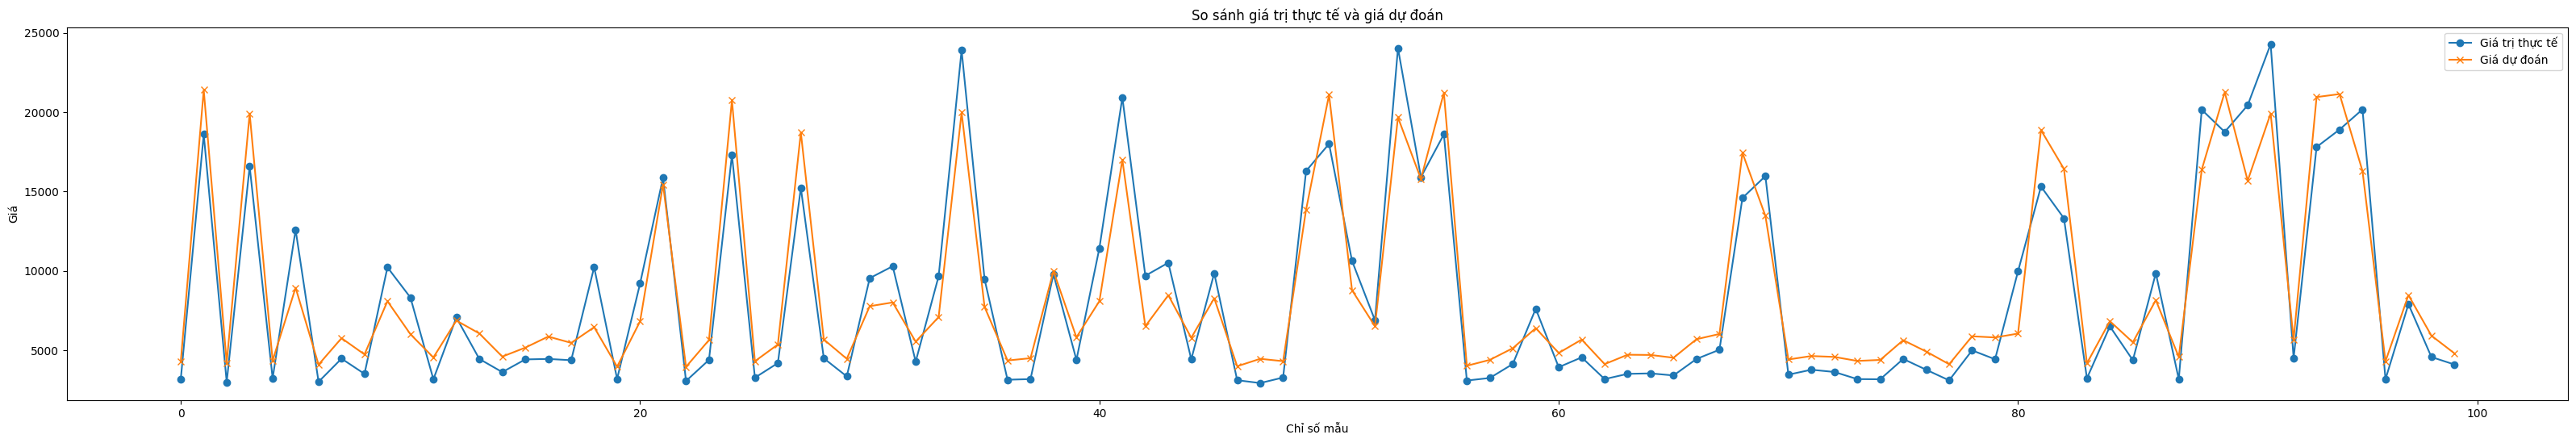

In [ ]:
# Độ dài của tập kiểm tra
n = len(y_test)

# Tạo list chứa chỉ số của các mẫu
indices = list(range(n))

# Vẽ biểu đồ so sánh giá trị thực tế và giá dự đoán
plt.figure(figsize=(40, 6))
plt.plot(indices[:100], y_test[:100], label='Giá trị thực tế', marker='o')
plt.plot(indices[:100], y_pred[:100], label='Giá dự đoán', marker='x')
plt.title('So sánh giá trị thực tế và giá dự đoán')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Giá')
plt.legend()
plt.show()

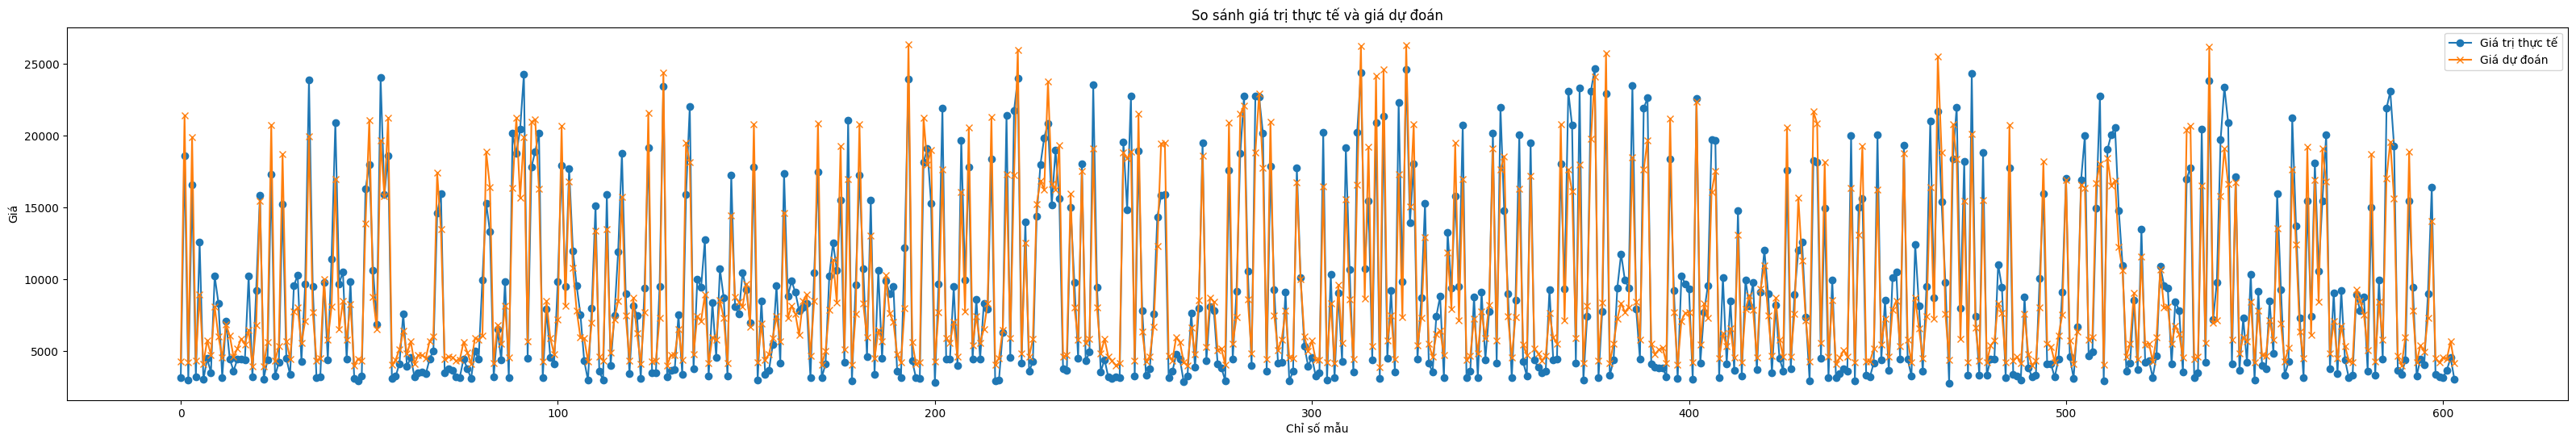

In [ ]:

n = len(y_test)

indices = list(range(n))

plt.figure(figsize=(40, 6))
plt.plot(indices, y_test, label='Giá trị thực tế', marker='o')
plt.plot(indices, y_pred, label='Giá dự đoán', marker='x')
plt.title('So sánh giá trị thực tế và giá dự đoán')
plt.xlabel('Chỉ số mẫu')
plt.ylabel('Giá')
plt.legend()
plt.show()


### Dự đoán giá dựa vào mô hình LSTM

In [ ]:
df_LSTM = df["close"]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
min_max_scaler = MinMaxScaler()
# Chuẩn hóa dữ liệu
df_LSTM = min_max_scaler.fit_transform(df_LSTM.values.reshape(-1, 1))

In [ ]:
len(df_LSTM)

3035

In [ ]:
n_sample = int(len(df_LSTM)*0.8)
data_train = df_LSTM[:n_sample]
data_test= df_LSTM[n_sample:]

In [ ]:
X_train ,y_train = [] ,[]
for i in range(100 ,len(data_train)):
  X_train.append(data_train[i - 100 :i,0])
  y_train.append(data_train[i ,0])


In [ ]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)

num_samples = len(df_LSTM) - 100

# Thay đổi hình dạng của X_train để phù hợp với mô hình LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] ,1))

# Thay đổi hình dạng của y_train để phù hợp với mô hình LSTM
y_train = np.reshape(y_train, (y_train.shape[0], 1))


In [ ]:
#Khởi tạo mô hình
model = Sequential()

# Thêm lớp LSTM đầu tiên
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))

# Thêm lớp LSTM thứ hai
model.add(LSTM(units=64))

# Thêm lớp Dropout
model.add(Dropout(0.5))

# Thêm lớp Dense (đầu ra)
model.add(Dense(units=1))

# Thêm lớp Activation
model.add(Activation('linear'))

# Compile mô hình
model.compile(loss="mean_absolute_error", optimizer="adam", metrics=['mean_absolute_error'])

# Đặt tên và đường dẫn đầy đủ cho file mô hình cần lưu
checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/Project/model_LSTM_stock.h5",
                                   monitor="loss",
                                   save_best_only=True)
# Huấn luyện mô hình
hist = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=1, validation_split=0.2 ,callbacks=[checkpoint])

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 0.0461 - mean_absolute_error: 0.0461

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



15/15 [==============================] - 14s 716ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - val_loss: 0.0371 - val_mean_absolute_error: 0.0371
Epoch 2/50
15/15 [==============================] - 7s 459ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - val_loss: 0.0300 - val_mean_absolute_error: 0.0300
Epoch 3/50
15/15 [==============================] - 9s 617ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213
Epoch 4/50
15/15 [==============================] - 6s 424ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - val_loss: 0.0406 - val_mean_absolute_error: 0.0406
Epoch 5/50
15/15 [==============================] - 9s 608ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231
Epoch 6/50
15/15 [==============================] - 7s 449ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316
Epoch 7/50
15/15 [========

In [ ]:
y_train = min_max_scaler.inverse_transform(y_train)
y_train_predict = model.predict(X_train)
y_train_predict = min_max_scaler.inverse_transform(y_train_predict)

73/73 [==============================] - 6s 78ms/step


In [ ]:
# Tính toán các độ đo
mse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)
mae = mean_absolute_error(y_train, y_train_predict)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 115439.16087175696
R-squared: 0.9944679975241664
Mean Absolute Error: 188.38986971615927


##### Xử lí với dữ liệu test

In [ ]:
X_test ,y_test = [] ,[]
for i in range(100 ,len(data_test)):
  X_test.append(data_test[i - 100 :i,0])
  y_test.append(data_test[i ,0])

In [ ]:
import numpy as np

X_test = np.array(X_test)
y_test = np.array(y_test)

num_samples = len(df_LSTM) - 100

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] ,1))

y_test = np.reshape(y_test, (y_test.shape[0], 1))


In [ ]:
y_test = min_max_scaler.inverse_transform(y_test)
y_test_predict = model.predict(X_test)
y_test_predict = min_max_scaler.inverse_transform(y_test_predict)

16/16 [==============================] - 1s 58ms/step


In [ ]:
# Tính toán các độ đo
mse = mean_squared_error(y_test, y_test_predict)
r2 = r2_score(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 647441.0121968719
R-squared: 0.9198390852590452
Mean Absolute Error: 672.8271754037229


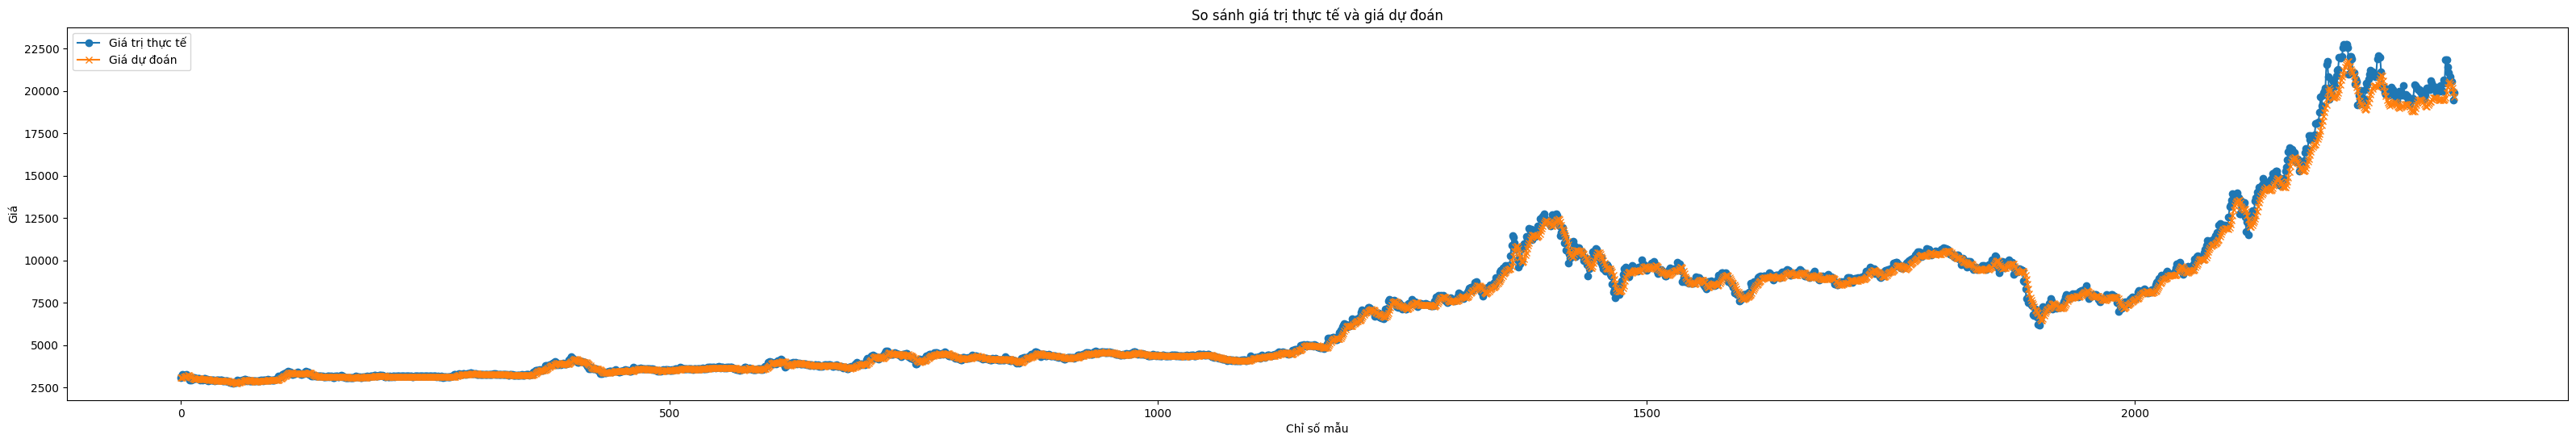

In [ ]:
def plot(actual ,predict):
  n = len(actual)

  indices = list(range(n))

  plt.figure(figsize=(40, 6))
  plt.plot(indices, actual, label='Giá trị thực tế', marker='o')
  plt.plot(indices, predict, label='Giá dự đoán', marker='x')
  plt.title('So sánh giá trị thực tế và giá dự đoán')
  plt.xlabel('Chỉ số mẫu')
  plt.ylabel('Giá')
  plt.legend()
  plt.show()

plot(y_train ,y_train_predict)

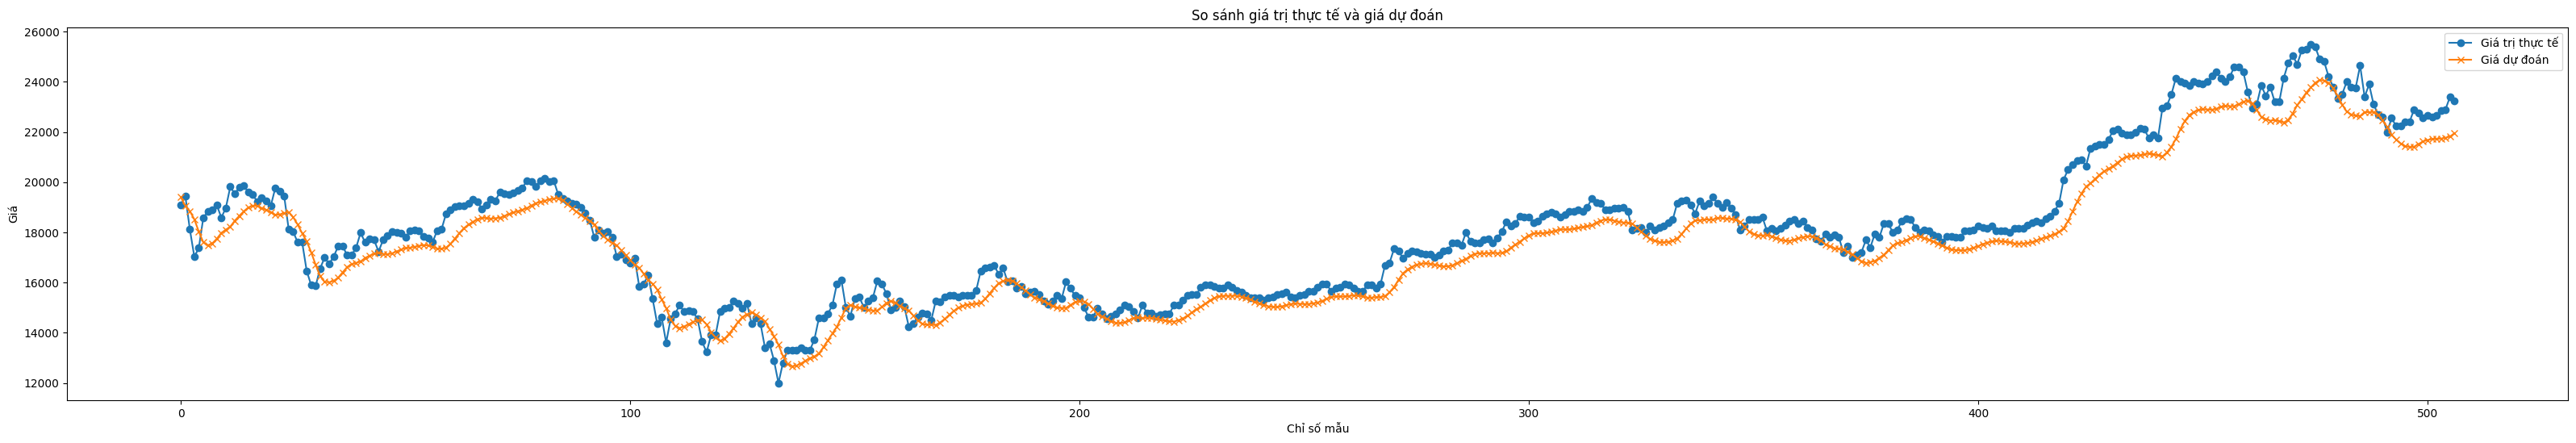

In [ ]:
plot(y_test ,y_test_predict)